In [25]:
import yfinance as yf
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

def download_stock_data(tickers, start_date, end_date):
    """
    Download historical stock price data for multiple tickers.
    
    Parameters:
    - tickers (list): List of stock ticker symbols
    - start_date (str): Start date for data retrieval (format: 'YYYY-MM-DD')
    - end_date (str): End date for data retrieval (format: 'YYYY-MM-DD')
    
    Returns:
    - DataFrame with adjusted closing prices
    """
    # Download data
    data = yf.download(tickers, start=start_date, end=end_date)
    
    # Extract adjusted closing prices
    prices = data['Adj Close']
    
    return prices

def analyze_stock_correlations(prices):
    """
    Compute and visualize correlation matrix for stock prices.
    
    Parameters:
    - prices (DataFrame): DataFrame of stock prices
    
    Returns:
    - Correlation matrix
    - Generates correlation heatmap
    """
    # Compute correlation matrix
    correlation_matrix = prices.pct_change().corr()
    
    # Create correlation heatmap
    plt.figure(figsize=(12, 10))
    sns.heatmap(correlation_matrix, 
                annot=True,  # Show numeric correlation values
                cmap='coolwarm',  # Color palette
                center=0,  # Center color at 0
                vmin=-1, 
                vmax=1,
                square=True)
    plt.title('Stock Returns Correlation Heatmap')
    plt.tight_layout()
    plt.show()
    
    return correlation_matrix

etfs = ["^GSPC"]

tech_giants = ["MSFT", "AAPL", "GOOGL", "META", "NVDA", "AMD", "INTC"]

financial_sector = ["JPM", "GS", "BAC", "WFC"]

oil_energy = ["XOM", "CVX", "SHEL", "BP"]

high_negative_correlation = ["XOM", "FSLR", "CVX", "TSLA", "NFLX", "M", "AMZN", "SO", "PG", "NKE"]

# Combined list of all tickers
all_tickers = etfs + tech_giants + financial_sector + oil_energy + high_negative_correlation

def main(tickers, start_date= '2024-01-01', end_date= '2024-12-01', N=5):

    # Download stock prices
    prices = download_stock_data(tickers, start_date, end_date)
    
    # Analyze correlations
    correlation_matrix = analyze_stock_correlations(prices)
    
    # Print detailed correlation insights
    #print("\nCorrelation Matrix Details:")
    #print(correlation_matrix)
    
    # Identify highest correlated pairs
    print("\nHighest Correlations:")
    corr_unstack = correlation_matrix.unstack()
    top_correlations = corr_unstack[corr_unstack < 1].nlargest(N)
    print(top_correlations)
    top_negative = corr_unstack[corr_unstack < 1].nsmallest(N)
    print("\nHighest Negative Correlations:")
    print(top_negative)
    return correlation_matrix


# 2023

[*********************100%***********************]  24 of 24 completed


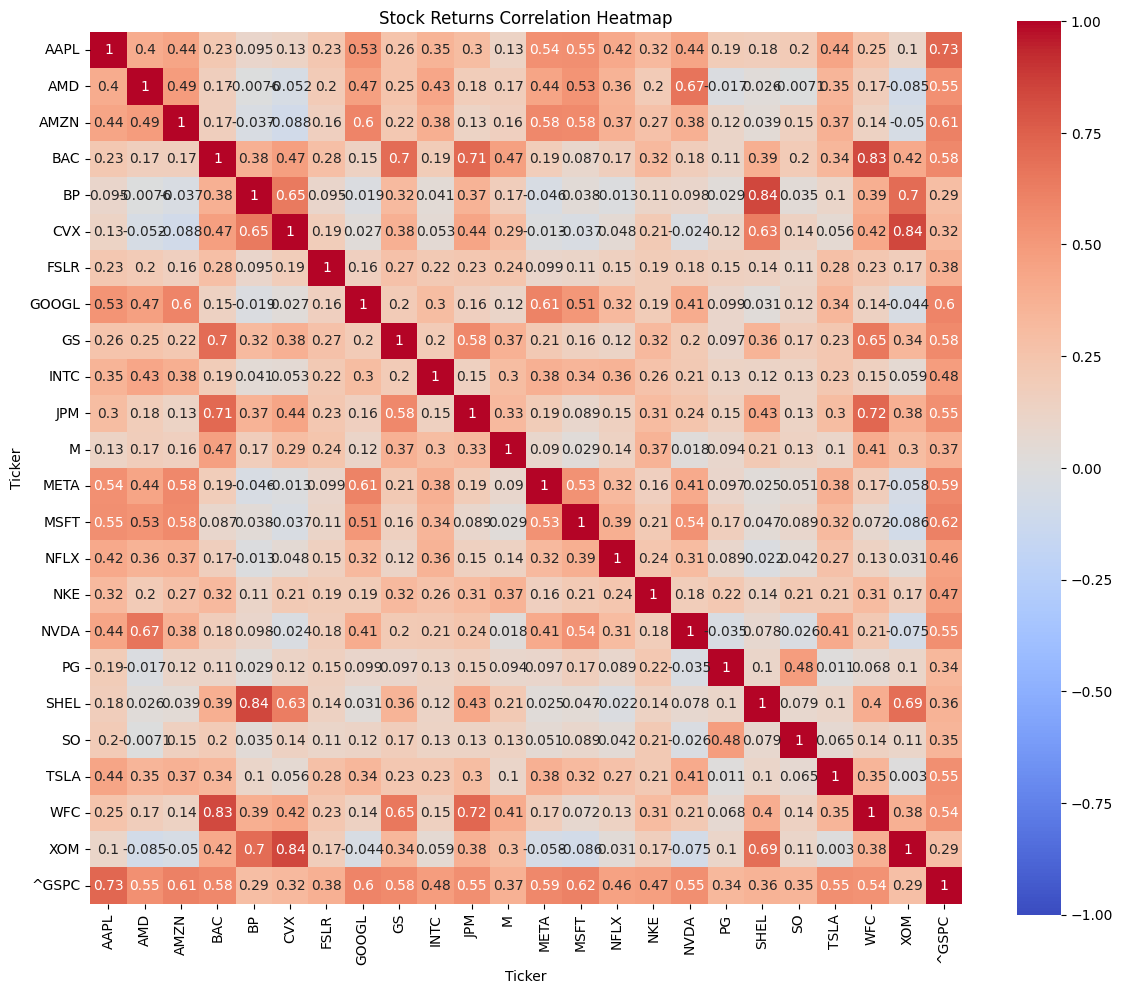


Highest Correlations:
Ticker  Ticker
CVX     XOM       0.837492
XOM     CVX       0.837492
BP      SHEL      0.836725
SHEL    BP        0.836725
BAC     WFC       0.831972
dtype: float64

Highest Negative Correlations:
Ticker  Ticker
AMZN    CVX      -0.088215
CVX     AMZN     -0.088215
MSFT    XOM      -0.085556
XOM     MSFT     -0.085556
AMD     XOM      -0.084830
dtype: float64


In [26]:
matrix_23 = main(all_tickers, start_date= '2023-01-01', end_date= '2024-01-01')

# 2024

[*********************100%***********************]  24 of 24 completed


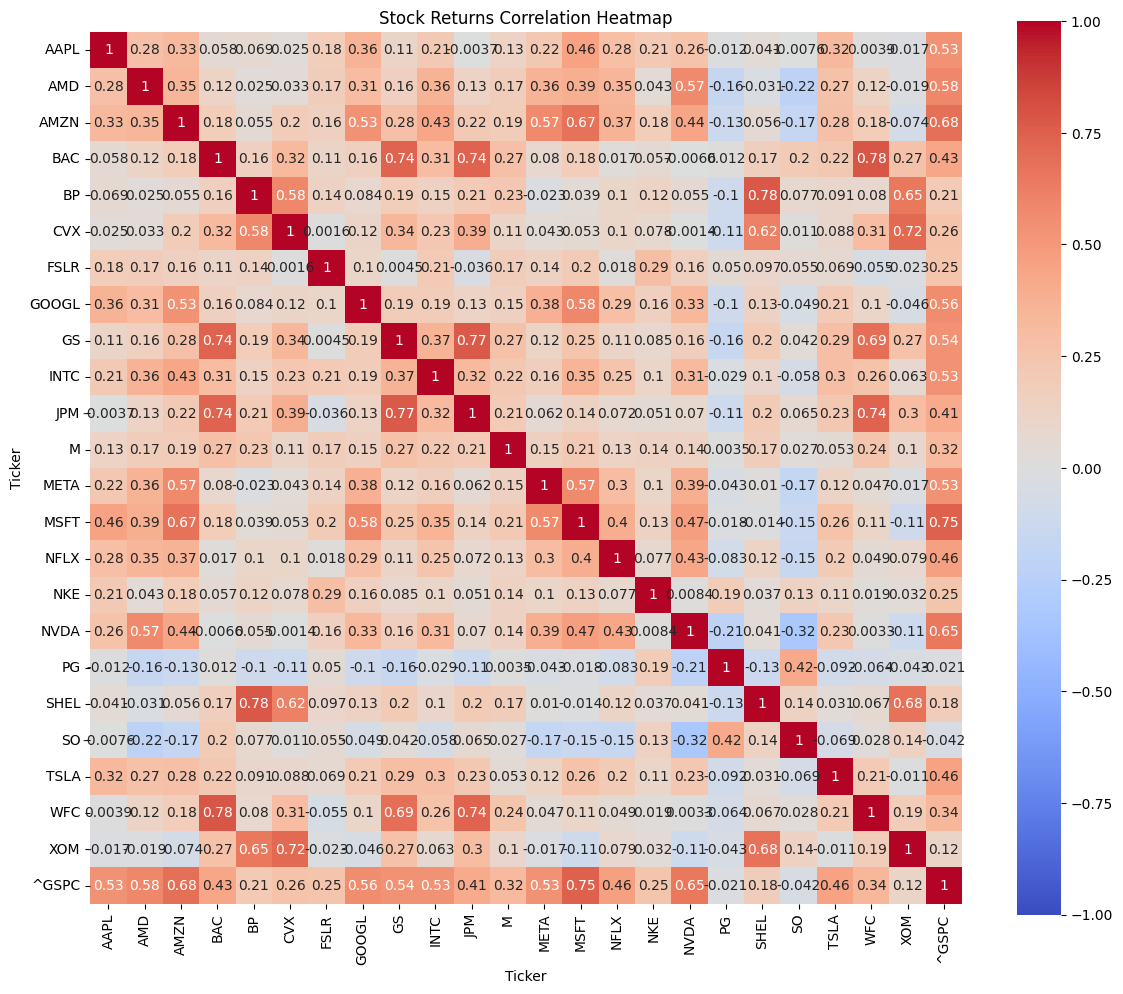


Highest Correlations:
Ticker  Ticker
BAC     WFC       0.781359
WFC     BAC       0.781359
BP      SHEL      0.777530
SHEL    BP        0.777530
GS      JPM       0.771197
dtype: float64

Highest Negative Correlations:
Ticker  Ticker
NVDA    SO       -0.324552
SO      NVDA     -0.324552
AMD     SO       -0.215015
SO      AMD      -0.215015
NVDA    PG       -0.214250
dtype: float64


In [27]:

matrix_24 = main(all_tickers)

# Cambio interanual

In [28]:
matrix_23

Ticker,AAPL,AMD,AMZN,BAC,BP,CVX,FSLR,GOOGL,GS,INTC,...,NFLX,NKE,NVDA,PG,SHEL,SO,TSLA,WFC,XOM,^GSPC
Ticker,,,,,,,,,,,,,,,,,,,,,
AAPL,1.000000,0.402136,0.441677,0.226393,0.095333,0.132220,0.228680,0.528273,0.257591,0.352118,...,0.420592,0.321109,0.444878,0.190374,0.178464,0.195665,0.444278,0.252385,0.101811,0.725659
AMD,0.402136,1.000000,0.489142,0.168189,-0.007606,-0.051786,0.198117,0.465173,0.252751,0.430020,...,0.362674,0.196113,0.668893,-0.017398,0.025843,-0.007079,0.346434,0.173638,-0.084830,0.546300
AMZN,0.441677,0.489142,1.000000,0.170717,-0.036697,-0.088215,0.163839,0.600858,0.222844,0.383809,...,0.372054,0.266315,0.380411,0.115374,0.039123,0.149244,0.372994,0.137378,-0.050057,0.610805
BAC,0.226393,0.168189,0.170717,1.000000,0.380137,0.473292,0.284203,0.146203,0.697295,0.194458,...,0.167195,0.323164,0.175077,0.110969,0.388461,0.196748,0.342527,0.831972,0.417397,0.581232
BP,0.095333,-0.007606,-0.036697,0.380137,1.000000,0.645756,0.095451,-0.019362,0.318853,0.041142,...,-0.012968,0.114187,0.097715,0.028502,0.836725,0.034586,0.104887,0.386101,0.701594,0.290491
CVX,0.132220,-0.051786,-0.088215,0.473292,0.645756,1.000000,0.185982,0.026907,0.377444,0.053265,...,0.048301,0.205873,-0.023772,0.117438,0.625966,0.143903,0.056052,0.423635,0.837492,0.324451
FSLR,0.228680,0.198117,0.163839,0.284203,0.095451,0.185982,1.000000,0.162673,0.267522,0.216504,...,0.151580,0.192619,0.178150,0.152969,0.143075,0.105617,0.276244,0.232167,0.173651,0.376297
GOOGL,0.528273,0.465173,0.600858,0.146203,-0.019362,0.026907,0.162673,1.000000,0.202063,0.303221,...,0.321101,0.189098,0.405932,0.098753,0.030633,0.118989,0.337729,0.141825,-0.043847,0.598202
GS,0.257591,0.252751,0.222844,0.697295,0.318853,0.377444,0.267522,0.202063,1.000000,0.200576,...,0.124097,0.323694,0.204003,0.097189,0.355463,0.174109,0.233648,0.649012,0.343453,0.576938


In [29]:
matrix_24

Ticker,AAPL,AMD,AMZN,BAC,BP,CVX,FSLR,GOOGL,GS,INTC,...,NFLX,NKE,NVDA,PG,SHEL,SO,TSLA,WFC,XOM,^GSPC
Ticker,,,,,,,,,,,,,,,,,,,,,
AAPL,1.000000,0.276958,0.326072,0.058268,0.069250,0.024730,0.183245,0.364243,0.110179,0.212686,...,0.283025,0.211736,0.261340,-0.011750,0.041304,-0.007608,0.323286,0.003892,-0.017333,0.533636
AMD,0.276958,1.000000,0.349506,0.121130,0.024665,0.032877,0.174975,0.309465,0.161533,0.362188,...,0.351460,0.042861,0.572707,-0.162355,-0.030565,-0.215015,0.268156,0.123349,-0.019099,0.581435
AMZN,0.326072,0.349506,1.000000,0.180204,0.054752,0.195183,0.161984,0.533214,0.280949,0.432529,...,0.366594,0.184848,0.443868,-0.126403,0.056365,-0.165791,0.281131,0.181205,-0.073920,0.683747
BAC,0.058268,0.121130,0.180204,1.000000,0.162027,0.315470,0.113668,0.160841,0.735813,0.312290,...,0.017251,0.056871,-0.006564,0.011563,0.168814,0.200986,0.220543,0.781359,0.266738,0.432731
BP,0.069250,0.024665,0.054752,0.162027,1.000000,0.578933,0.142762,0.084173,0.187344,0.145950,...,0.102248,0.120142,0.055387,-0.101986,0.777530,0.077117,0.090879,0.079695,0.654576,0.205876
CVX,0.024730,0.032877,0.195183,0.315470,0.578933,1.000000,0.001593,0.116536,0.339256,0.229698,...,0.104368,0.077661,-0.001365,-0.111958,0.616760,0.010854,0.087988,0.311787,0.717187,0.259654
FSLR,0.183245,0.174975,0.161984,0.113668,0.142762,0.001593,1.000000,0.102264,0.004451,0.206477,...,0.018012,0.290445,0.162368,0.050165,0.097237,0.055176,0.068845,-0.054634,-0.023015,0.252042
GOOGL,0.364243,0.309465,0.533214,0.160841,0.084173,0.116536,0.102264,1.000000,0.190375,0.190250,...,0.286506,0.162353,0.328713,-0.104030,0.134177,-0.048959,0.207506,0.102425,-0.046084,0.558204
GS,0.110179,0.161533,0.280949,0.735813,0.187344,0.339256,0.004451,0.190375,1.000000,0.366059,...,0.112948,0.084617,0.164974,-0.156199,0.200070,0.041582,0.290622,0.688321,0.267527,0.537844


[*********************100%***********************]  24 of 24 completed
[*********************100%***********************]  24 of 24 completed


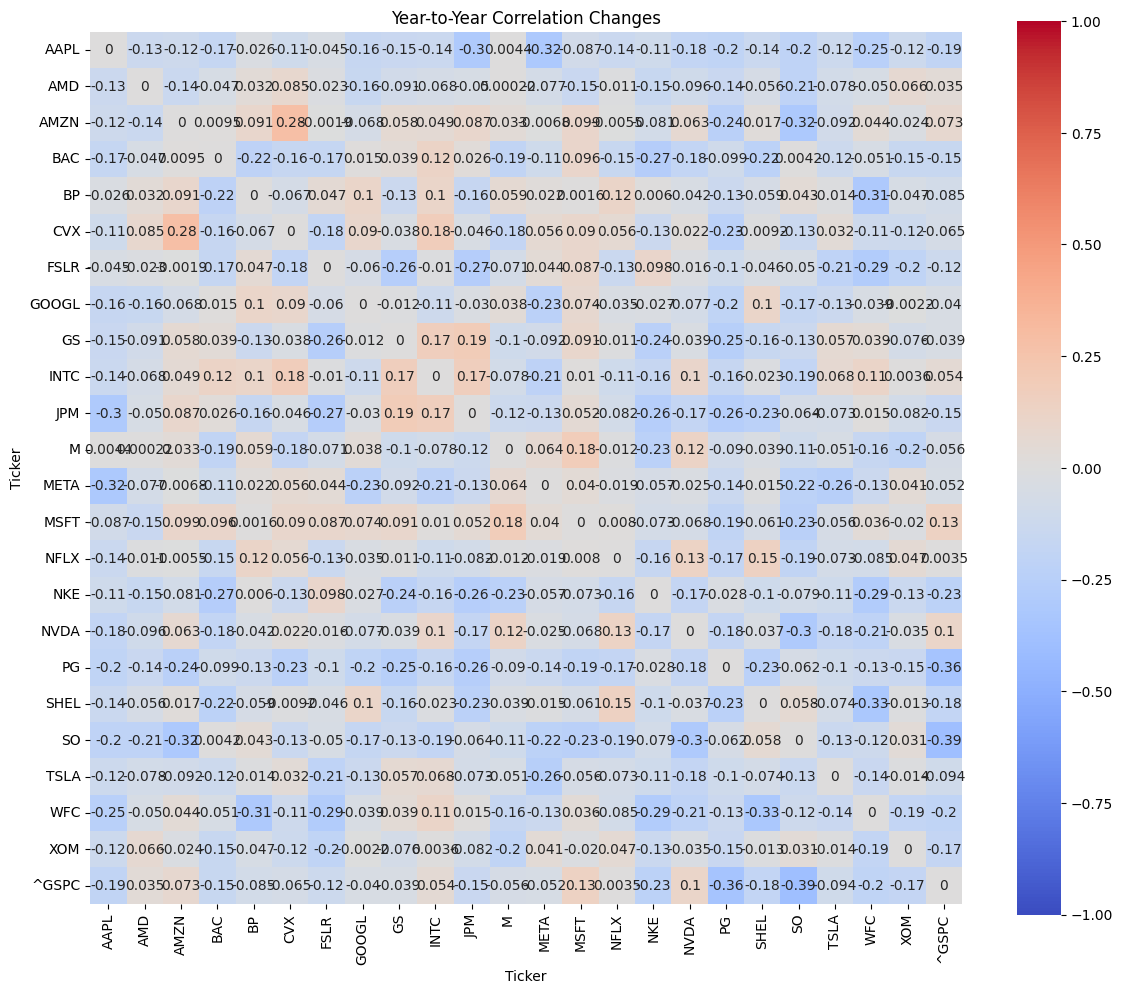


Most Significant Correlation Changes:

Largest Positive Changes:
Ticker  Ticker
AMZN    CVX       0.283397
CVX     AMZN      0.283397
GS      JPM       0.192183
JPM     GS        0.192183
M       MSFT      0.183839
dtype: float64

Largest Negative Changes:
Ticker  Ticker
SO      ^GSPC    -0.392890
^GSPC   SO       -0.392890
PG      ^GSPC    -0.356564
^GSPC   PG       -0.356564
SHEL    WFC      -0.328005
dtype: float64


In [30]:
import yfinance as yf
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

def calculate_correlation_changes(correlation_matrix_1, correlation_matrix_2):
    """
    Calculate and visualize the changes in correlation between two years.
    
    Parameters:
    - correlation_matrix_1 (pd.DataFrame): Correlation matrix for first year
    - correlation_matrix_2 (pd.DataFrame): Correlation matrix for second year
    
    Returns:
    - DataFrame of correlation changes
    - Visualization of correlation changes
    """
    # Calculate the difference in correlation matrices
    correlation_changes = correlation_matrix_2 - correlation_matrix_1
    
    # Visualization of correlation changes
    plt.figure(figsize=(12, 10))
    sns.heatmap(correlation_changes, 
                annot=True,  
                cmap='coolwarm',  # Red for negative changes, blue for positive
                center=0,  
                vmin=-1, 
                vmax=1,
                square=True)
    plt.title('Year-to-Year Correlation Changes')
    plt.tight_layout()
    plt.show()
    
    # Find most significant correlation changes
    changes_unstack = correlation_changes.unstack()
    changes_unstack = changes_unstack[np.abs(changes_unstack) > 0.1]  # Significant changes
    
    print("\nMost Significant Correlation Changes:")
    significant_positive_changes = changes_unstack[changes_unstack > 0.1].nlargest(5)
    significant_negative_changes = changes_unstack[changes_unstack < -0.1].nsmallest(5)
    
    print("\nLargest Positive Changes:")
    print(significant_positive_changes)
    
    print("\nLargest Negative Changes:")
    print(significant_negative_changes)
    
    return correlation_changes

def download_and_analyze_correlations(tickers, years):
    """
    Download and analyze correlations for multiple years.
    
    Parameters:
    - tickers (list): List of stock ticker symbols
    - years (list): List of two years to compare
    
    Returns:
    - Correlation matrices for each year
    """
    correlation_matrices = {}
    
    for year in years:
        start_date = f'{year}-01-01'
        end_date = f'{year}-12-31'
        
        # Download stock prices
        prices = yf.download(tickers, start=start_date, end=end_date)['Adj Close']
        
        # Calculate correlation matrix
        correlation_matrices[year] = prices.pct_change().corr()
    
    return correlation_matrices

def main():
    # Stocks to analyze
    tickers = all_tickers
    
    # Years to compare
    years = [2023, 2024]
    
    # Download and analyze correlations
    correlation_matrices = download_and_analyze_correlations(tickers, years)
    
    # Calculate and visualize correlation changes
    correlation_changes = calculate_correlation_changes(
        correlation_matrices[years[0]], 
        correlation_matrices[years[1]]
    )

if __name__ == "__main__":
    main()